# Stream Publisher Games Rating Analysis

*  Observations about the Publisher Games Ratings



In [8]:
# Dependencies and Setup
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns


In [9]:
# Read Streams Games Data CSV file
games_df = pd.read_csv('cleaned_steam_data.csv')

# Print first 5 lines of dataframe
games_df.head(5)

,AppID,Name,Release_date,Peak_CCU,Developers,Publishers,Windows,Mac,Linux,Required_age,Categories,Genres,Achievements,Metacritic_score,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime,Price
0,263380,Driftmoon,2014-01-03,1,"Ville Mönkkönen,Anne Mönkkönen",Instant Kingdom,True,True,True,0,"Single-player,Steam Achievements,Captions avai...","Adventure,Indie,RPG",15,73,223,28,6,6,14.99
1,263340,Continue?9876543210,2014-01-03,0,Jason Oda,Jason Oda,True,True,True,0,"Single-player,Partial Controller Support","Action,Adventure,Indie",0,62,97,78,0,0,9.99
2,262550,Gunman Clive,2014-01-03,0,Hörberg Productions,Hörberg Productions,True,False,False,0,"Single-player,Steam Achievements","Action,Indie",9,0,656,86,42,65,1.99
3,264320,Captain Morgane and the Golden Turtle,2014-01-03,0,WizarBox,Reef Entertainment,True,False,False,0,Single-player,"Adventure,Casual",0,0,102,66,264,336,4.99
4,263680,Unearthed: Trail of Ibn Battuta - Episode 1 - ...,2014-01-03,0,Semaphore,Semaphore,True,True,False,0,"Single-player,Steam Achievements,Full controll...","Action,Adventure",7,0,429,380,95,141,4.99


In [10]:

# Create a new column to get Total Ratings
games_df['Total_ratings'] = games_df['Positive_ratings'] + games_df['Negative_ratings']

# Calculate the percentage of positive ratings and add it as a new column in the dataframe
games_df['Positive_Rating_Percentage'] = (games_df['Positive_ratings'] / games_df['Total_ratings']) * 100

# Round the percentage to two decimal places
games_df['Positive_Rating_Percentage'] = games_df['Positive_Rating_Percentage'].round(2)

games_df.head(1)


,AppID,Name,Release_date,Peak_CCU,Developers,Publishers,Windows,Mac,Linux,Required_age,...,Genres,Achievements,Metacritic_score,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime,Price,Total_ratings,Positive_Rating_Percentage
0,263380,Driftmoon,2014-01-03,1,"Ville Mönkkönen,Anne Mönkkönen",Instant Kingdom,True,True,True,0,...,"Adventure,Indie,RPG",15,73,223,28,6,6,14.99,251,88.84


In [11]:
# Print Dataframe info
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23239 entries, 0 to 23238
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       23239 non-null  int64  
 1   Name                        23239 non-null  object 
 2   Release_date                23239 non-null  object 
 3   Peak_CCU                    23239 non-null  int64  
 4   Developers                  23239 non-null  object 
 5   Publishers                  23239 non-null  object 
 6   Windows                     23239 non-null  bool   
 7   Mac                         23239 non-null  bool   
 8   Linux                       23239 non-null  bool   
 9   Required_age                23239 non-null  int64  
 10  Categories                  23239 non-null  object 
 11  Genres                      23239 non-null  object 
 12  Achievements                23239 non-null  int64  
 13  Metacritic_score            232

In [12]:
## Find top 10 publishers in terms of Positive Rating Received
top_10_positive_publishers = games_df.copy()

top_10_positive_publishers = top_10_positive_publishers.sort_values(by='Positive_ratings', ascending=False).head(10)

top_10_positive_publishers

,AppID,Name,Release_date,Peak_CCU,Developers,Publishers,Windows,Mac,Linux,Required_age,...,Genres,Achievements,Metacritic_score,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime,Price,Total_ratings,Positive_Rating_Percentage
1734,271590,Grand Theft Auto V,2015-04-13,170527,Rockstar North,Rockstar Games,True,False,False,17,...,"Action,Adventure",77,96,1171197,210154,13650,6274,0.00,1381351,84.79
8085,578080,PUBG: BATTLEGROUNDS,2017-12-21,275374,"KRAFTON, Inc.","KRAFTON, Inc.",True,False,False,0,...,"Action,Adventure,Free to Play,Massively Multip...",37,0,1154655,895978,21963,7134,0.00,2050633,56.31
2998,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,42263,Ubisoft Montreal,Ubisoft,True,False,False,17,...,Action,0,0,929372,138530,13837,3100,19.99,1067902,87.03
8339,252490,Rust,2018-02-08,96112,Facepunch Studios,Facepunch Studios,True,True,False,17,...,"Action,Adventure,Indie,Massively Multiplayer,RPG",90,69,703687,108223,16623,3035,39.99,811910,86.67
1913,292030,The Witcher® 3: Wild Hunt,2015-05-18,16482,CD PROJEKT RED,CD PROJEKT RED,True,False,False,0,...,RPG,78,93,617738,25020,3696,929,39.99,642758,96.11
10068,945360,Among Us,2018-11-16,8713,Innersloth,Innersloth,True,False,False,0,...,Casual,24,85,577656,51069,1360,669,3.99,628725,91.88
4189,381210,Dead by Daylight,2016-06-14,46073,Behaviour Interactive Inc.,Behaviour Interactive Inc.,True,False,False,17,...,Action,203,0,494648,112924,8942,1648,7.99,607572,81.41
2151,252950,Rocket League®,2015-07-06,34491,Psyonix LLC,Psyonix LLC,True,False,False,0,...,"Action,Indie,Racing,Sports",88,86,493188,62447,15653,2538,0.00,555635,88.76
3422,413150,Stardew Valley,2016-02-26,39710,ConcernedApe,ConcernedApe,True,True,True,0,...,"Indie,RPG,Simulation",40,89,475785,8983,3753,1458,14.99,484768,98.15
7217,346110,ARK: Survival Evolved,2017-08-27,98215,"Studio Wildcard,Instinct Games,Efecto Studios,...",Studio Wildcard,True,True,True,0,...,"Action,Adventure,Indie,Massively Multiplayer,RPG",32,70,461567,98701,10660,1062,29.99,560268,82.38


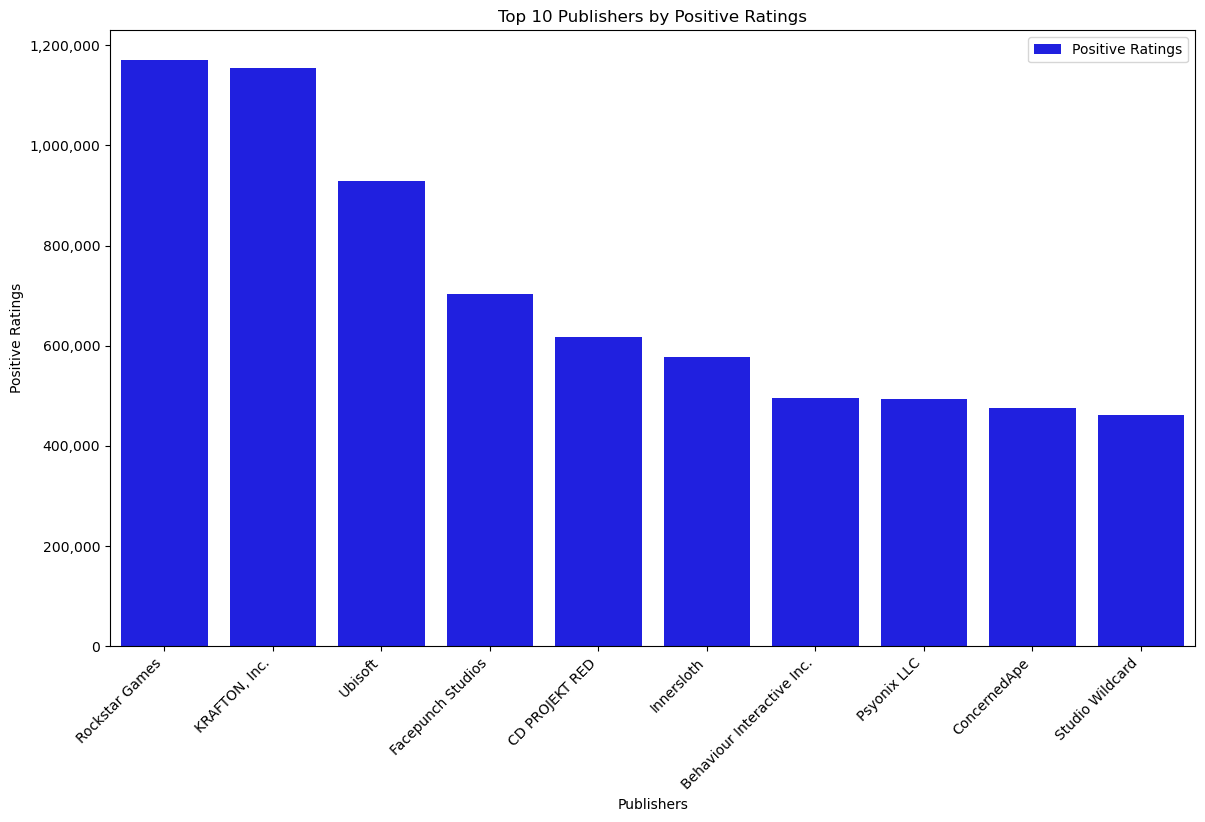

In [13]:
# Create a stacked bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_positive_publishers, x=top_10_positive_publishers['Publishers'], y=top_10_positive_publishers['Positive_ratings'], color='blue', label='Positive Ratings')

# Customize the plot
plt.title('Top 10 Publishers by Positive Ratings')
plt.xlabel('Publishers')
plt.ylabel('Positive Ratings')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.legend()
plt.show()

In [14]:
# Filter publishers with 100000 or more ratings received
filtered_games_df = games_df[games_df['Total_ratings'] >= 100000]

## Find top 10 publishers in terms of Positive Rating Percentage Received

top_10_pos_percent_publishers = filtered_games_df.copy()

top_10_pos_percent_publishers = top_10_pos_percent_publishers.sort_values(by='Positive_Rating_Percentage', ascending=False).head(10)

top_10_pos_percent_publishers


,AppID,Name,Release_date,Peak_CCU,Developers,Publishers,Windows,Mac,Linux,Required_age,...,Genres,Achievements,Metacritic_score,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime,Price,Total_ratings,Positive_Rating_Percentage
16739,1794680,Vampire Survivors,2021-12-17,15530,poncle,poncle,True,True,False,0,...,"Action,Casual,Indie,RPG,Early Access",127,0,112499,1252,1309,915,2.99,113751,98.90
11184,1118200,People Playground,2019-07-23,9050,mestiez,Studio Minus,True,False,False,0,...,"Action,Casual,Indie,Simulation",17,0,127114,1429,1973,526,9.99,128543,98.89
22636,1966720,Lethal Company,2023-10-23,169110,Zeekerss,Zeekerss,True,False,False,0,...,"Action,Adventure,Indie,Early Access",0,0,110177,1342,472,328,9.99,111519,98.80
13522,1145360,Hades,2020-09-17,6396,Supergiant Games,Supergiant Games,True,True,False,0,...,"Action,Indie,RPG",49,93,190880,2662,2075,1330,24.99,193542,98.62
9883,294100,RimWorld,2018-10-17,26495,Ludeon Studios,Ludeon Studios,True,True,True,0,...,"Indie,Simulation,Strategy",0,87,133389,2318,10424,3402,34.99,135707,98.29
3422,413150,Stardew Valley,2016-02-26,39710,ConcernedApe,ConcernedApe,True,True,True,0,...,"Indie,RPG,Simulation",40,89,475785,8983,3753,1458,14.99,484768,98.15
12729,1289310,Helltaker,2020-05-11,137,vanripper,vanripper,True,True,True,0,...,"Adventure,Free to Play,Indie",10,0,104471,2160,101,65,0.00,106631,97.97
10337,646570,Slay the Spire,2019-01-23,11641,Mega Crit Games,Mega Crit Games,True,True,True,0,...,"Indie,Strategy",46,89,112452,2428,4791,2075,24.99,114880,97.89
1086,250900,The Binding of Isaac: Rebirth,2014-11-04,16630,"Nicalis, Inc.,Edmund McMillen","Nicalis, Inc.",True,True,True,17,...,Action,637,0,201024,4749,10084,3162,14.99,205773,97.69
10211,960090,Bloons TD 6,2018-12-17,16132,Ninja Kiwi,Ninja Kiwi,True,True,False,0,...,Strategy,140,0,193859,4932,2741,1069,9.99,198791,97.52


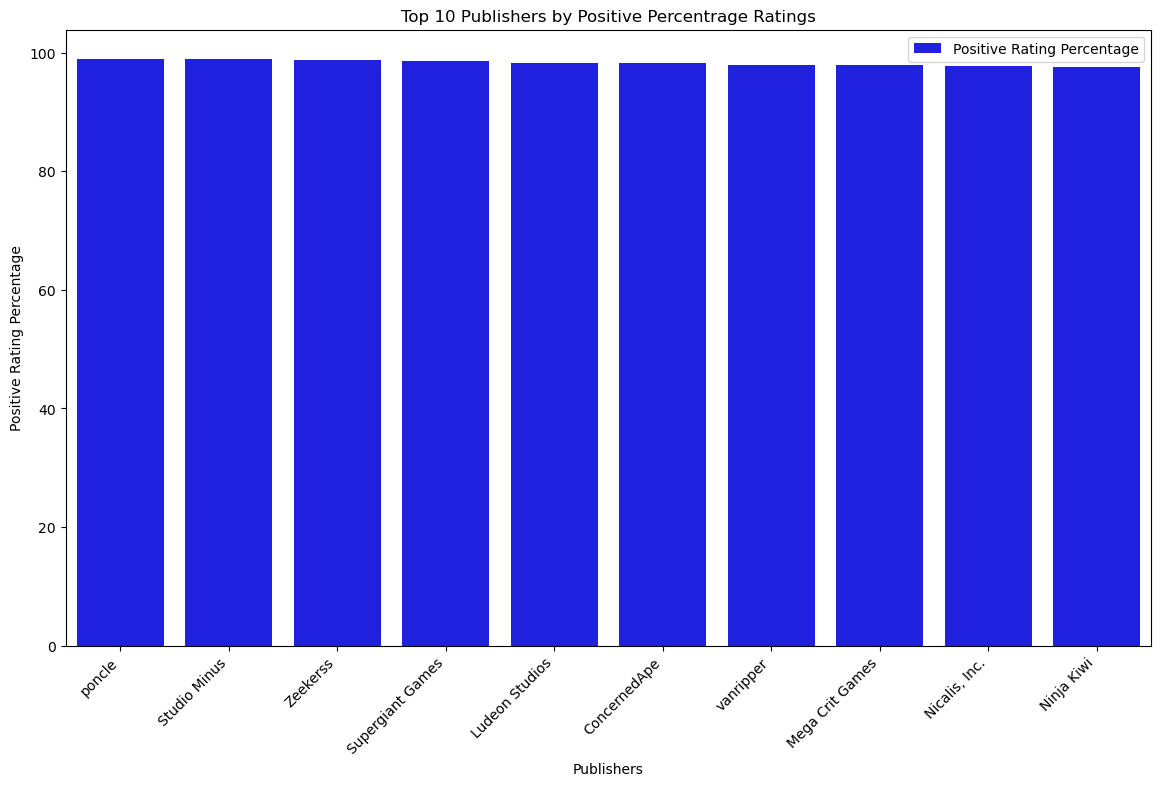

In [15]:
# Create a stacked bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_pos_percent_publishers, x=top_10_pos_percent_publishers['Publishers'], y=top_10_pos_percent_publishers['Positive_Rating_Percentage'], color='blue', label='Positive Rating Percentage')

# Customize the plot
plt.title('Top 10 Publishers by Positive Percentrage Ratings')
plt.xlabel('Publishers')
plt.ylabel('Positive Rating Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [16]:

## Find top 10 publishers in terms of Negative Rating Received
top_10_negative_publishers = games_df.copy()

top_10_negative_publishers = top_10_negative_publishers.sort_values(by='Negative_ratings', ascending=False)

top_10_negative_publishers = top_10_negative_publishers.head(10)

top_10_negative_publishers

,AppID,Name,Release_date,Peak_CCU,Developers,Publishers,Windows,Mac,Linux,Required_age,...,Genres,Achievements,Metacritic_score,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime,Price,Total_ratings,Positive_Rating_Percentage
8085,578080,PUBG: BATTLEGROUNDS,2017-12-21,275374,"KRAFTON, Inc.","KRAFTON, Inc.",True,False,False,0,...,"Action,Adventure,Free to Play,Massively Multip...",37,0,1154655,895978,21963,7134,0.00,2050633,56.31
1734,271590,Grand Theft Auto V,2015-04-13,170527,Rockstar North,Rockstar Games,True,False,False,17,...,"Action,Adventure",77,96,1171197,210154,13650,6274,0.00,1381351,84.79
2998,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,42263,Ubisoft Montreal,Ubisoft,True,False,False,17,...,Action,0,0,929372,138530,13837,3100,19.99,1067902,87.03
14097,1091500,Cyberpunk 2077,2020-12-09,13739,CD PROJEKT RED,CD PROJEKT RED,True,False,False,17,...,RPG,44,86,391643,129925,3851,2420,59.99,521568,75.09
4189,381210,Dead by Daylight,2016-06-14,46073,Behaviour Interactive Inc.,Behaviour Interactive Inc.,True,False,False,17,...,Action,203,0,494648,112924,8942,1648,7.99,607572,81.41
8339,252490,Rust,2018-02-08,96112,Facepunch Studios,Facepunch Studios,True,True,False,17,...,"Action,Adventure,Indie,Massively Multiplayer,RPG",90,69,703687,108223,16623,3035,39.99,811910,86.67
16500,1517290,Battlefield™ 2042,2021-11-19,5060,DICE,Electronic Arts,True,False,False,17,...,"Action,Adventure,Casual",34,0,39121,106038,1841,937,29.99,145159,26.95
14333,1468810,鬼谷八荒 Tale of Immortal,2021-01-27,12085,鬼谷工作室,"鬼谷工作室,Lightning Games",True,False,False,0,...,"Action,Adventure,Indie,RPG,Simulation,Early Ac...",110,0,105384,103661,5187,1796,19.99,209045,50.41
7217,346110,ARK: Survival Evolved,2017-08-27,98215,"Studio Wildcard,Instinct Games,Efecto Studios,...",Studio Wildcard,True,True,True,0,...,"Action,Adventure,Indie,Massively Multiplayer,RPG",32,70,461567,98701,10660,1062,29.99,560268,82.38
8494,433850,Z1 Battle Royale,2018-02-28,131,Daybreak Game Company,Daybreak Game Company,True,False,False,0,...,"Action,Adventure,Free to Play,Massively Multip...",0,70,115417,92764,3536,140,0.00,208181,55.44


C:\Users\rakhi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rakhi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rakhi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rakhi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rakhi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23460 (\N{CJK UNIFIED IDEOGRAPH-5BA4}) missing from current font.
  fig.canvas.print_figure(bytes_

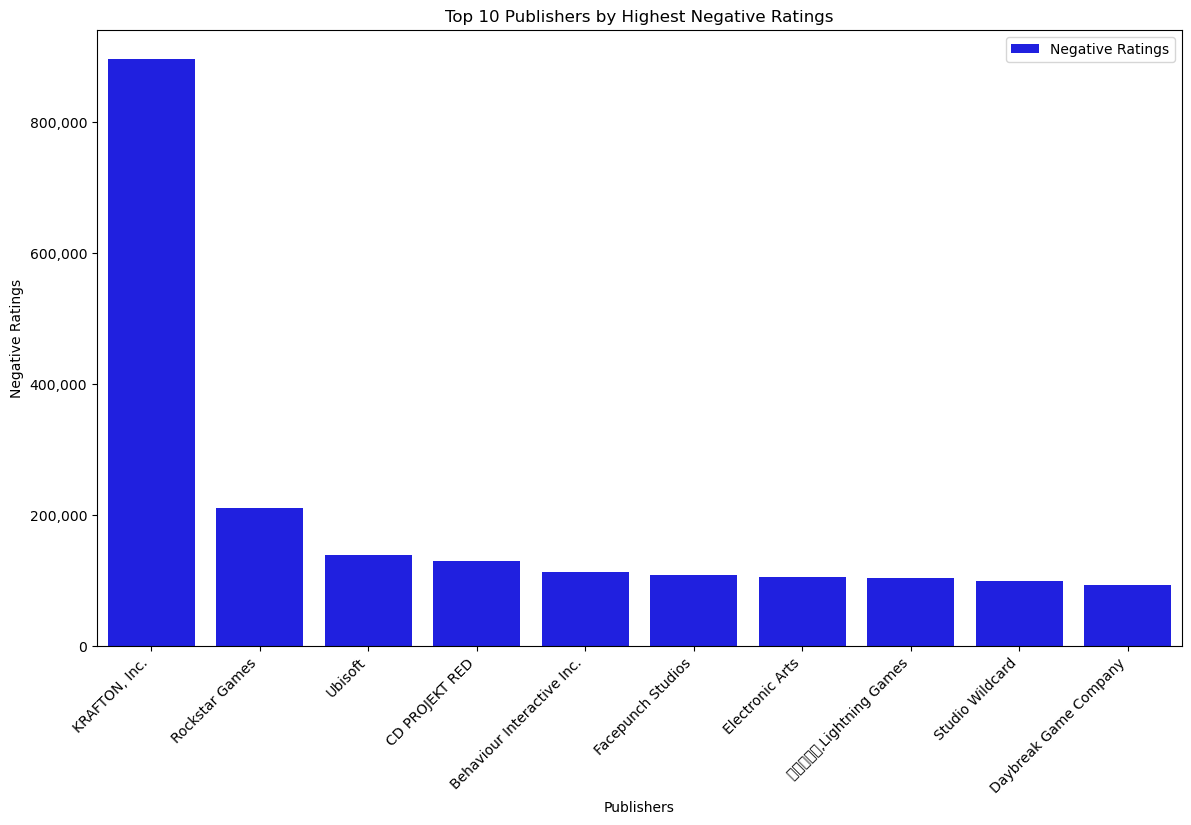

In [17]:
# Create a stacked bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_negative_publishers, x=top_10_negative_publishers['Publishers'], y=top_10_negative_publishers['Negative_ratings'], color='blue', label='Negative Ratings')

# Customize the plot
plt.title('Top 10 Publishers by Highest Negative Ratings')
plt.xlabel('Publishers')
plt.ylabel('Negative Ratings')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.legend()
plt.show()

## SECOND PART

In [13]:
#!/usr/bin/env python3

import sqlite3
import pandas as pd

from pathlib import Path

database_path = "../Resources/icecreamstore.sqlite"
Path(database_path).touch()

conn = sqlite3.connect(database_path)
c = conn.cursor()

c.execute('''CREATE TABLE icecreamstore ( ID int, Flavors text, Quantities int, Price float)''')

csv_icecream = pd.read_csv("../Resources/icecreamstore.csv")
csv_icecream.to_sql("icecreamstore", conn, if_exists='append', index=False)

conn.close()
